In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#seperating the categorical and numerical coklumns

catvars=list(data.select_dtypes(include=['object']).columns)
numvars=list(data.select_dtypes(include=['int32','int64','float32','float64']).columns)

print(catvars,numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

  # handling null values

In [6]:
data.shape

(215, 15)

In [7]:
def plotdistplot(col):
    
    plt.figure(figsize=(15,7))
    sns.distplot(data['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sns.distplot(data[col],kde=True,hist=False,label=col,color='black')
    plt.legend(['Actual Salary', col])

In [8]:
mostfreq=list(dict(data['salary'].value_counts()).items())[0]
mostfreq

(300000.0, 22)

In [9]:
data['salary'].mode()[0]

300000.0

In [10]:
data['salary_mean']=data['salary'].fillna(data['salary'].mean())
data['salary_median']=data['salary'].fillna(data['salary'].median())
data['salary_mode']=data['salary'].fillna(data['salary'].mode()[0])
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


C:\Users\Jayant Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

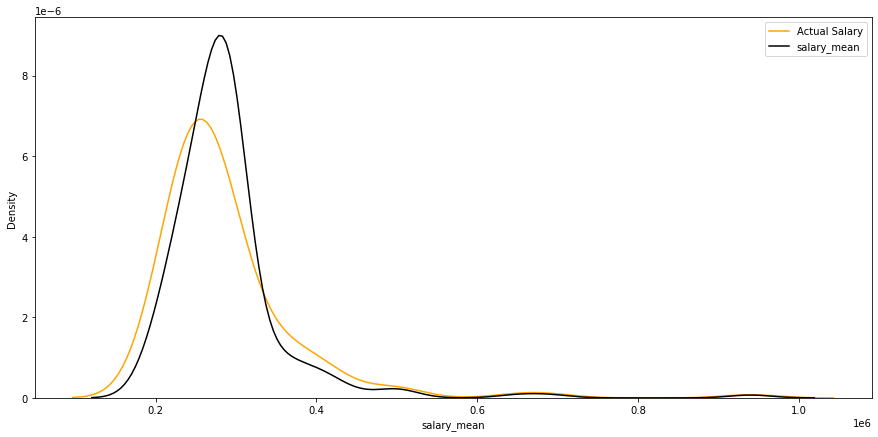

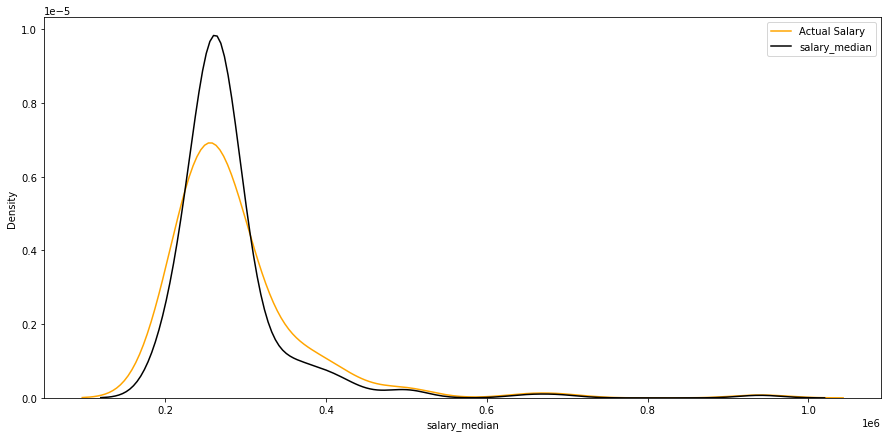

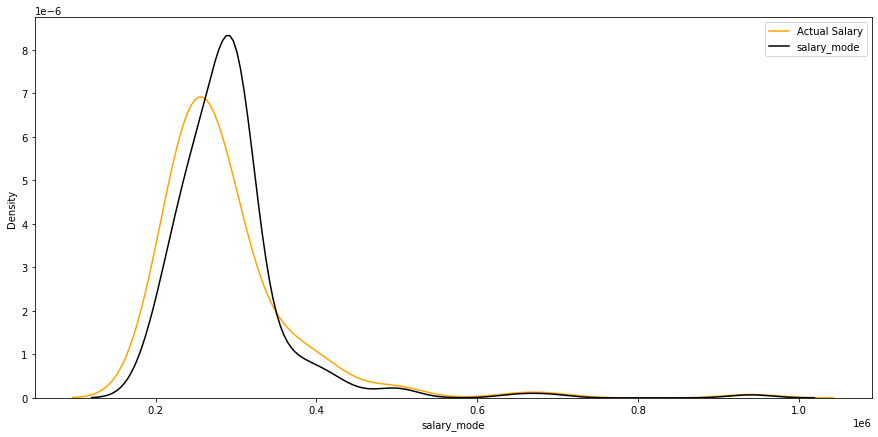

In [11]:
sallist=['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

In [12]:
#filling the salary with mean
data['salary']=data['salary'].fillna(data['salary'].mean())
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [13]:
data=data.drop(columns=['salary_mean','salary_median','salary_mode'],axis=1)
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# EDA

<AxesSubplot:xlabel='status', ylabel='count'>

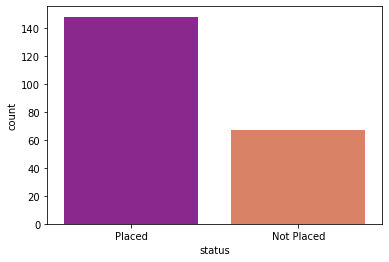

In [14]:
sns.countplot(x=data['status'],palette='plasma')

count plot for feature gender is showm below


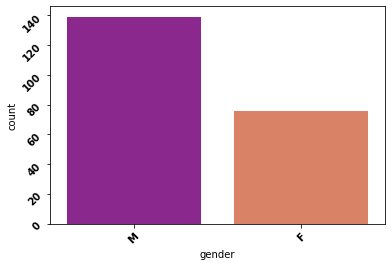

count plot for feature ssc_b is showm below


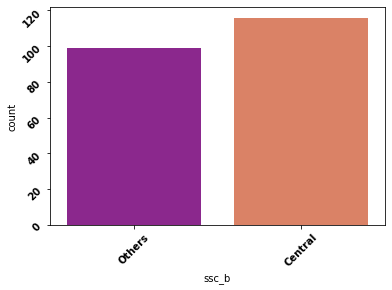

count plot for feature hsc_b is showm below


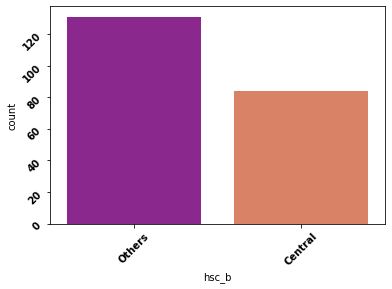

count plot for feature hsc_s is showm below


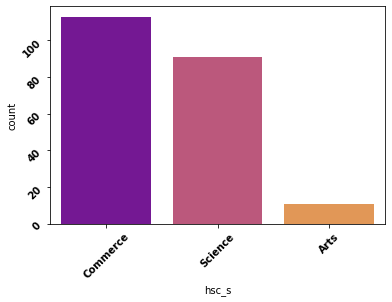

count plot for feature degree_t is showm below


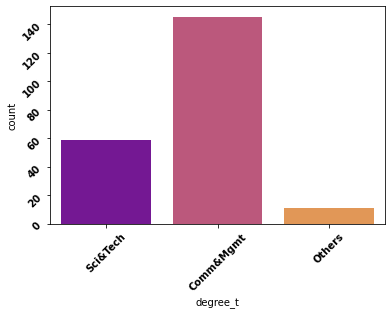

count plot for feature workex is showm below


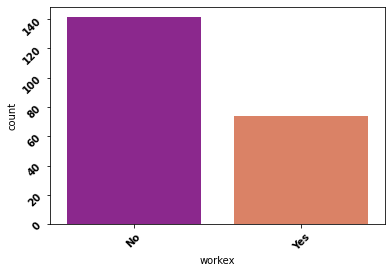

count plot for feature specialisation is showm below


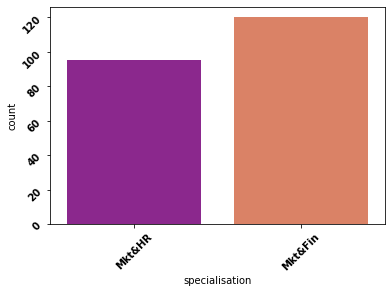

count plot for feature status is showm below


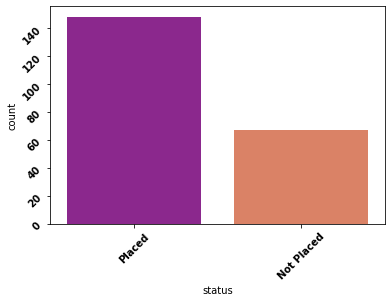

In [15]:
def valuecount(col):
    return dict(data[col].value_counts())
def getcountplot(col):
    sns.countplot(x=data[col],palette='plasma')
    plt.xticks(rotation='45',fontweight='bold',fontsize='10')
    plt.yticks(rotation='45',fontweight='bold',fontsize='10')
    plt.show()

for col in catvars:
    print(f'count plot for feature {col} is showm below')
    getcountplot(col)
    print('='*75)

In [16]:
getfinaldict={}
for col in catvars:
    getfinaldict[col]=valuecount(col)
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [17]:
#top science students placed
data[(data['degree_t']=='Sci&Tech')&(data['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)


,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [18]:
#top comm&mgt students placed
data[(data['degree_t']=='Comm&Mgmt')&(data['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [19]:
# max and min salary
#observation: max salary:9,40,000 and min salary:2,00,000

data[(data['salary']==max(data['salary']))|(data['salary']==min(data['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [20]:
# students with salary more than avg salary science dept
data[(data['degree_t']=='Sci&Tech')&(data['salary']>data['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.000000
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.000000
2,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.000000
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.000000
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.000000
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.000000
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.000000
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.000000
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.000000
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.000000


In [21]:
#students with salary more than avg salary comm&mgt dept

data[(data['degree_t']=='Comm&Mgmt')&(data['salary']>data['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.000000
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.000000
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.000000
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.000000
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,120,121,M,58.0,Others,40.0,Others,Science,59.0,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,288655.405405
71,29,30,M,62.0,Central,67.0,Central,Commerce,58.0,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,288655.405405
72,36,37,M,51.0,Central,44.0,Central,Commerce,57.0,Comm&Mgmt,No,64.00,Mkt&Fin,51.45,Not Placed,288655.405405
73,136,137,F,47.0,Central,59.0,Central,Arts,64.0,Comm&Mgmt,No,78.00,Mkt&Fin,61.58,Not Placed,288655.405405


In [22]:
data.groupby(['degree_t'])['status'].count()
#grouping all the students degree wise
#whenever you are performing groupby you must always perform some kind of aggregation,aggregation means finding the min ,max,avg,sum etc 

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
Name: status, dtype: int64

<AxesSubplot:xlabel='degree_t'>

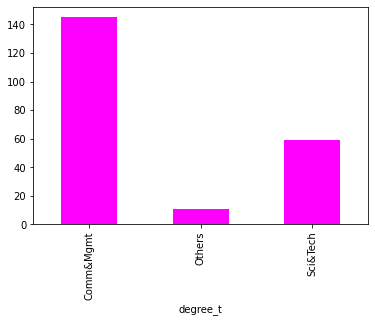

In [23]:
#maximum students placed from comm&mgmt
#here we are grouping the technical degree with respect to status and we want to find count of them  
data.groupby(['degree_t'])['status'].count().plot(kind='bar',color='magenta')
# it is similar to value count,but whenever we do value count we are not able to plot the data but using groupby we are able to plot because we are getting pandas series overhere      

In [24]:
data.groupby(['specialisation'])['status'].count()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: status, dtype: int64

<AxesSubplot:xlabel='specialisation'>

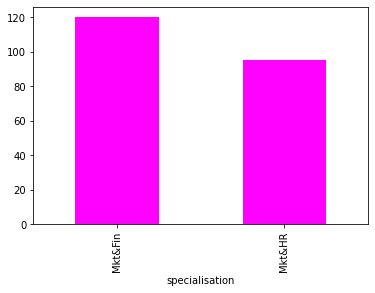

In [25]:
#marketing and finance specilisation are placed more
data.groupby(['specialisation'])['status'].count().plot(kind='bar',color='magenta')

In [26]:
data.groupby(['gender'])['status'].count()

gender
F     76
M    139
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

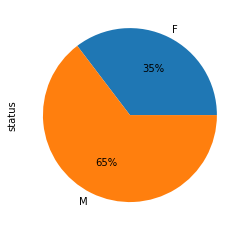

In [27]:
#female placed 35% and males 65%
data.groupby(['gender'])['status'].count().plot(kind='pie',autopct='%1.0f%%')
#autopct is responsible for giving label color inside the pie chart 

In [28]:
# max female salary

temp=data[data['gender']=='F']
temp

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
6,7,F,46.00,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,288655.405405
12,13,F,47.00,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,288655.405405
13,14,F,77.00,Central,87.0,Central,Commerce,59.0,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.000000
15,16,F,65.00,Central,75.0,Central,Commerce,69.0,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.000000
17,18,F,55.00,Central,67.0,Central,Commerce,64.0,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,288655.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.000000
198,199,F,67.00,Central,70.0,Central,Commerce,65.0,Others,No,88.00,Mkt&HR,71.96,Not Placed,288655.405405
204,205,F,74.00,Others,73.0,Others,Commerce,73.0,Comm&Mgmt,Yes,80.00,Mkt&Fin,67.69,Placed,210000.000000
208,209,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,288655.405405


In [29]:
temp=data[data['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap='plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


<AxesSubplot:ylabel='status'>

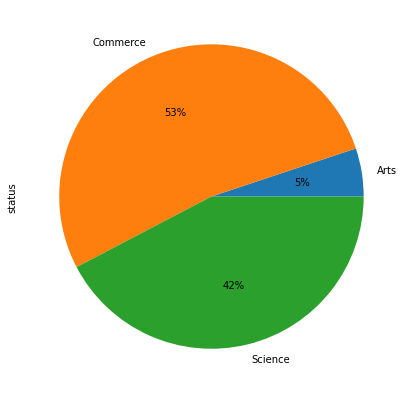

In [30]:
data.groupby(['hsc_s'])['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [31]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [32]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [33]:
len(getfinaldict['status']) , len(getfinaldict['degree_t'])

(2, 3)

In [34]:
boolcols=[key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols=[key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)
#to get len of all cat vars

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


# label encoding process

In [35]:
def labelencode(le,col):
    data[col]=le.fit_transform(data[col])

getmappings={}
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col]=dict(zip(le.classes_,le.transform(le.classes_)))
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [36]:
#this was the internal mapping structure by label encoder for mapping
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [37]:
#removing unwanted columns
data=data.drop(['sl_no'],axis=1)
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


# numerical columns EDA

In [38]:
numvars

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [39]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col:ssc_p are shown below


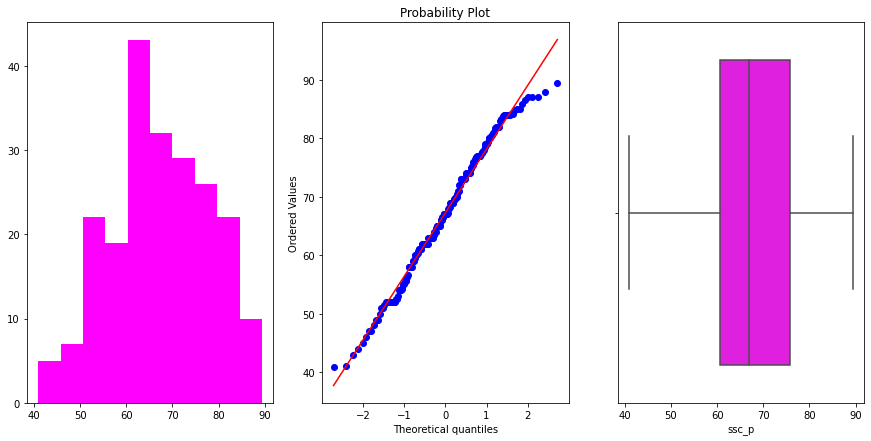

Distribution plots for col:hsc_p are shown below


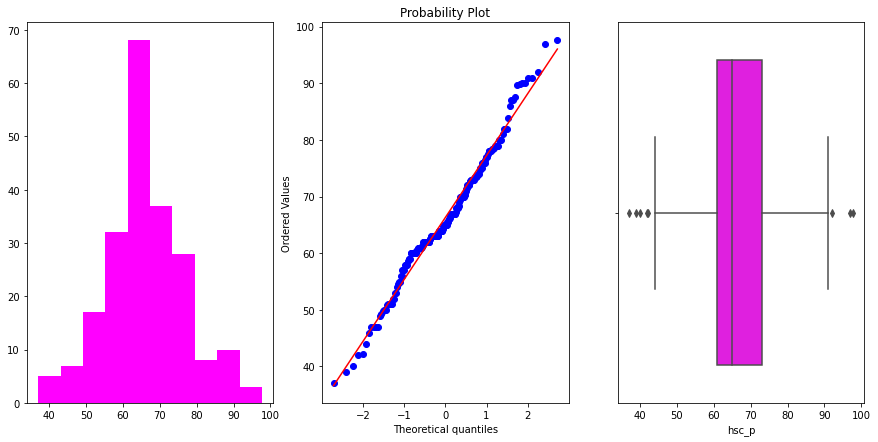

Distribution plots for col:degree_p are shown below


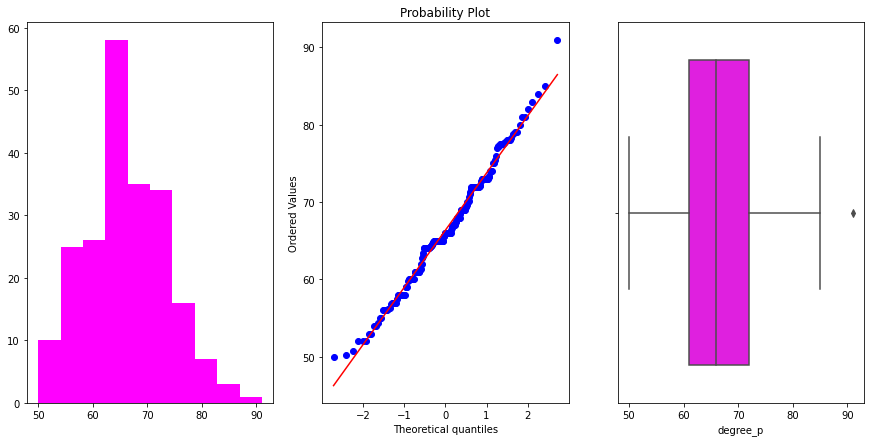

Distribution plots for col:etest_p are shown below


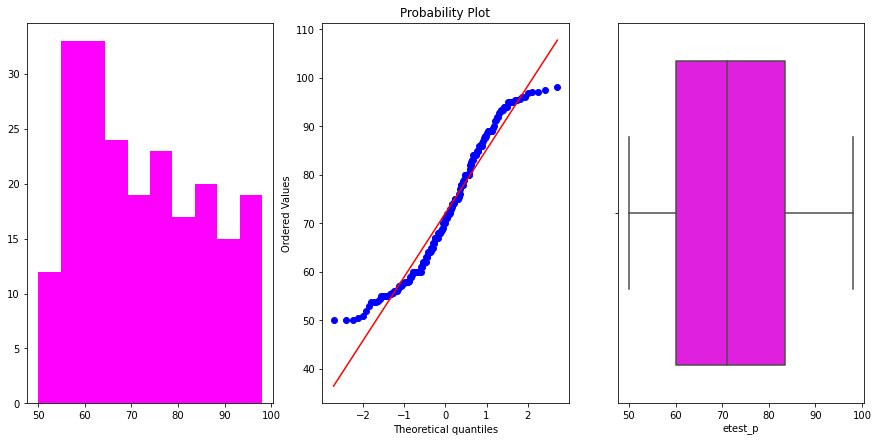

Distribution plots for col:mba_p are shown below


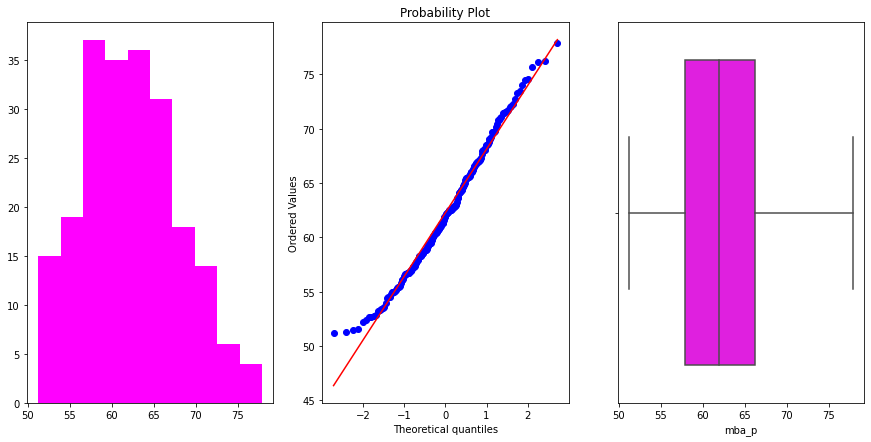

Distribution plots for col:salary are shown below


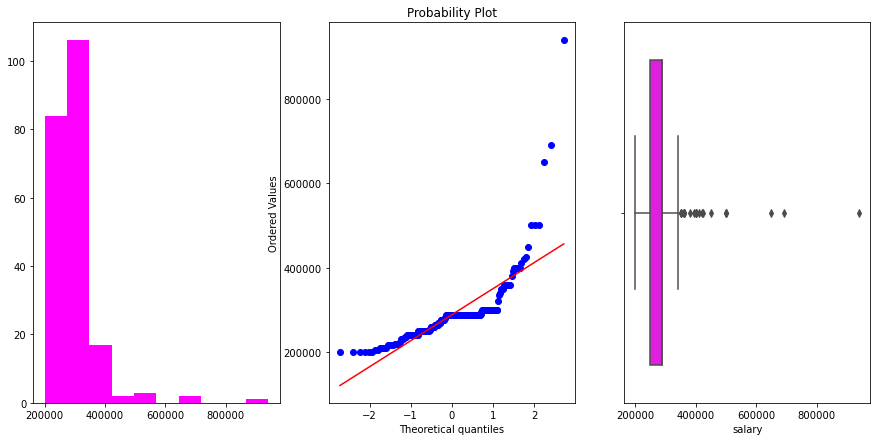

In [40]:
import scipy.stats as stats
#scipy --->scientific python
def getplots(data,col):   #it will take dataframe and column as input
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(x=data[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(x=data[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(x=data[col],color='magenta')
    
    plt.show()

for col in numvars[1:]:
    print(f'Distribution plots for col:{col} are shown below')
    getplots(data,col)
    print('='*75)

# feature selection

<AxesSubplot:>

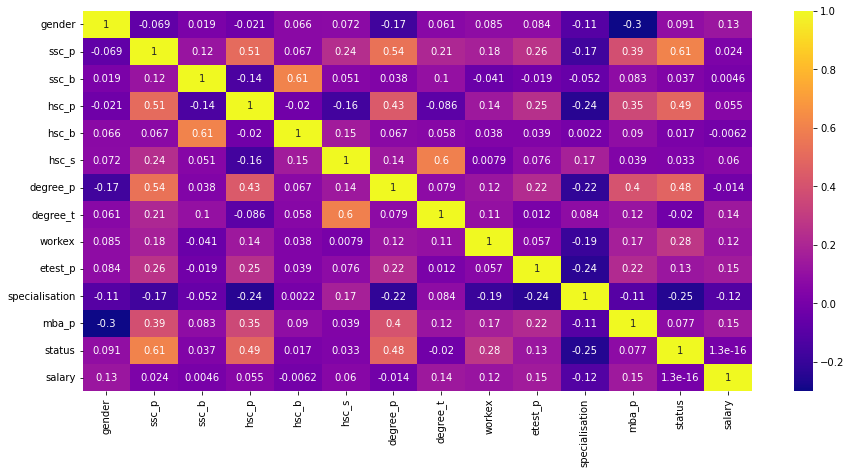

In [41]:
#checking for tightly correlated features
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

In [42]:
'''
We will drop the salary column as well
coz after getting the placement we will get to know the salary right!

'''


data1 = data.copy()  #making a copy of the data
test = data1['status']       #dependent feature
train = data1.drop(['status','salary'],axis = 1)   #independent feature
train.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [43]:
test.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

In [44]:
## extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
ec=ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

<AxesSubplot:>

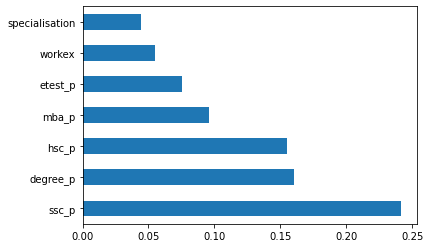

In [45]:
featbar=pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind='barh')
#it gives 7 feature which are most contributing

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

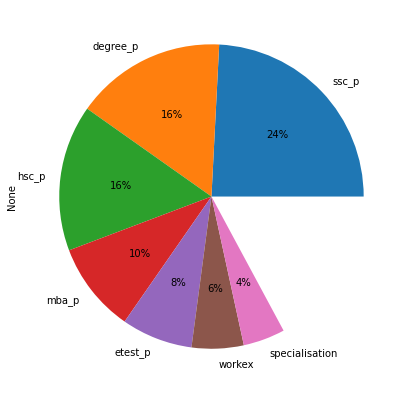

In [46]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [47]:
# another feature selection technique

<AxesSubplot:>

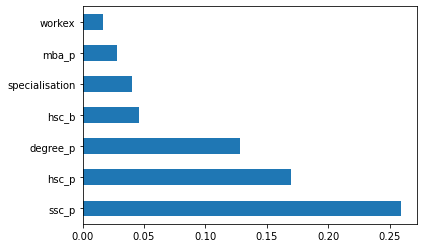

In [48]:
#mutual classif-----> for classification
#for regression problem----> mutual_info_regression is same as extretreeclassifier 

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

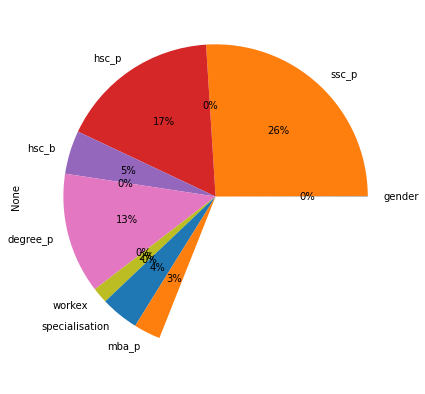

In [49]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [50]:
featbar.nlargest(10).index

Index(['ssc_p', 'degree_p', 'hsc_p', 'mba_p', 'etest_p', 'workex',
       'specialisation', 'hsc_s', 'degree_t', 'gender'],
      dtype='object')

In [51]:
ax.nlargest(10).index

Index(['ssc_p', 'hsc_p', 'degree_p', 'hsc_b', 'specialisation', 'mba_p',
       'workex', 'gender', 'ssc_b', 'hsc_s'],
      dtype='object')

In [52]:
'''
Selecting the top 10 contributing features in both cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features!

'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['workex', 'hsc_s', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'ssc_p', 'degree_p']


In [53]:
# selecting the common cols and will do training on these cols!
# these cols were selected as a nlargest result of 2 feature selection techniques!

train = data[commoncols]
train.head()

,workex,hsc_s,hsc_p,specialisation,gender,mba_p,ssc_p,degree_p
0,0,1,91.00,1,1,58.80,67.00,58.00
1,1,2,78.33,0,1,66.28,79.33,77.48
2,0,0,68.00,0,1,57.80,65.00,64.00
3,0,2,52.00,1,1,59.43,56.00,52.00
4,0,1,73.60,0,1,55.50,85.80,73.30


In [54]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [56]:
# renaming the cols

train = train[['gender','specialisation','hsc_s','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns = ['Gender','Specialisation','HSC_s','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,HSC_s,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,1,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,1,0,85.80,73.60,73.30,55.50


# model building

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [59]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

[Text(0.44907407407407407, 0.95, 'SSC_p <= 59.98\ngini = 0.439\nsamples = 172\nvalue = [56, 116]\nclass = Placed'),
 Text(0.12962962962962962, 0.85, 'High School_p <= 58.5\ngini = 0.314\nsamples = 41\nvalue = [33, 8]\nclass = Not_placed'),
 Text(0.09259259259259259, 0.75, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not_placed'),
 Text(0.16666666666666666, 0.75, 'High School_p <= 61.06\ngini = 0.48\nsamples = 20\nvalue = [12, 8]\nclass = Not_placed'),
 Text(0.07407407407407407, 0.65, 'SSC_p <= 46.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Placed'),
 Text(0.037037037037037035, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not_placed'),
 Text(0.1111111111111111, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Placed'),
 Text(0.25925925925925924, 0.65, 'Degree_p <= 69.7\ngini = 0.391\nsamples = 15\nvalue = [11, 4]\nclass = Not_placed'),
 Text(0.18518518518518517, 0.55, 'MBA_p <= 54.25\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = Not_placed'),
 T

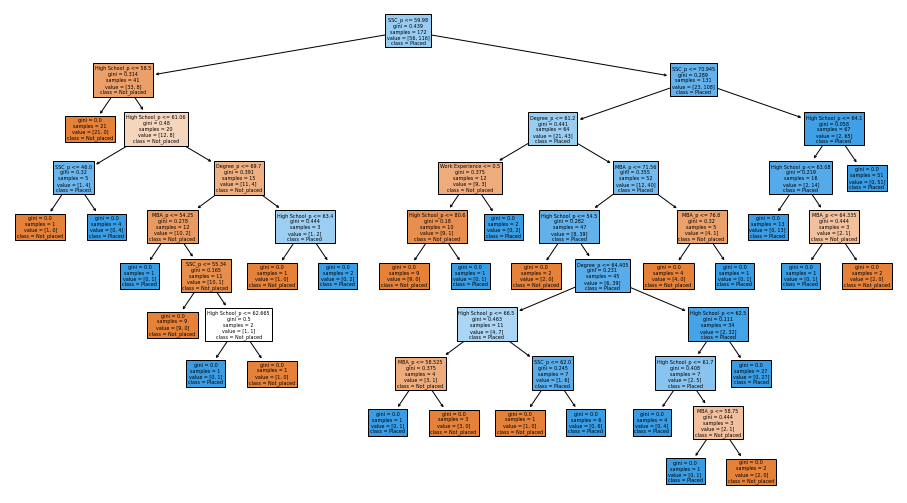

In [60]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [61]:
costpath = dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities = costpath.ccp_alphas,costpath.impurities

In [62]:
costpath

{'ccp_alphas': array([0.        , 0.00422833, 0.00422833, 0.00426357, 0.00434109,
        0.00473435, 0.00620897, 0.00697674, 0.00826873, 0.01178068,
        0.01185342, 0.0119541 , 0.01434505, 0.01522199, 0.01963357,
        0.04354394, 0.14599558]),
 'impurities': array([0.        , 0.00845666, 0.01691332, 0.02544045, 0.03412262,
        0.04359133, 0.0684272 , 0.07540395, 0.08367268, 0.14257607,
        0.15442948, 0.19029178, 0.20463683, 0.21985882, 0.23949239,
        0.28303633, 0.42903191])}

In [63]:
ccp_alpha

array([0.        , 0.00422833, 0.00422833, 0.00426357, 0.00434109,
       0.00473435, 0.00620897, 0.00697674, 0.00826873, 0.01178068,
       0.01185342, 0.0119541 , 0.01434505, 0.01522199, 0.01963357,
       0.04354394, 0.14599558])

In [64]:
modellist = []
for alpha in ccp_alpha:
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)
    

In [65]:
modellist

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004263565891472868),
 DecisionTreeClassifier(ccp_alpha=0.004341085271317831),
 DecisionTreeClassifier(ccp_alpha=0.004734354320287392),
 DecisionTreeClassifier(ccp_alpha=0.006208968510070101),
 DecisionTreeClassifier(ccp_alpha=0.0069767441860465115),
 DecisionTreeClassifier(ccp_alpha=0.008268733850129198),
 DecisionTreeClassifier(ccp_alpha=0.011780676876536203),
 DecisionTreeClassifier(ccp_alpha=0.011853417899929527),
 DecisionTreeClassifier(ccp_alpha=0.011954099636020114),
 DecisionTreeClassifier(ccp_alpha=0.014345049677053412),
 DecisionTreeClassifier(ccp_alpha=0.015221987315010573),
 DecisionTreeClassifier(ccp_alpha=0.019633565458658242),
 DecisionTreeClassifier(ccp_alpha=0.043543939616998095),
 DecisionTreeClassifier(ccp_alpha=0.14599558360017162)]

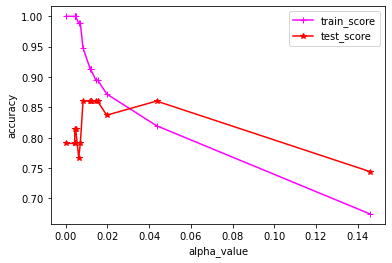

In [66]:
train_score = [clf.score(X_train,y_train) for clf in modellist]
test_score = [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label = 'train_score',marker = '+',color = 'magenta')
plt.plot(ccp_alpha,test_score,label = 'test_score',marker = '*',color = 'red')
plt.legend()
plt.show()

[Text(0.4, 0.9, 'SSC_p <= 59.98\ngini = 0.439\nsamples = 172\nvalue = [56, 116]\nclass = Placed'),
 Text(0.2, 0.7, 'gini = 0.314\nsamples = 41\nvalue = [33, 8]\nclass = Not_placed'),
 Text(0.6, 0.7, 'SSC_p <= 70.945\ngini = 0.289\nsamples = 131\nvalue = [23, 108]\nclass = Placed'),
 Text(0.4, 0.5, 'Degree_p <= 61.2\ngini = 0.441\nsamples = 64\nvalue = [21, 43]\nclass = Placed'),
 Text(0.2, 0.3, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = Not_placed'),
 Text(0.6, 0.3, 'MBA_p <= 71.56\ngini = 0.355\nsamples = 52\nvalue = [12, 40]\nclass = Placed'),
 Text(0.4, 0.1, 'gini = 0.282\nsamples = 47\nvalue = [8, 39]\nclass = Placed'),
 Text(0.8, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Not_placed'),
 Text(0.8, 0.5, 'gini = 0.058\nsamples = 67\nvalue = [2, 65]\nclass = Placed')]

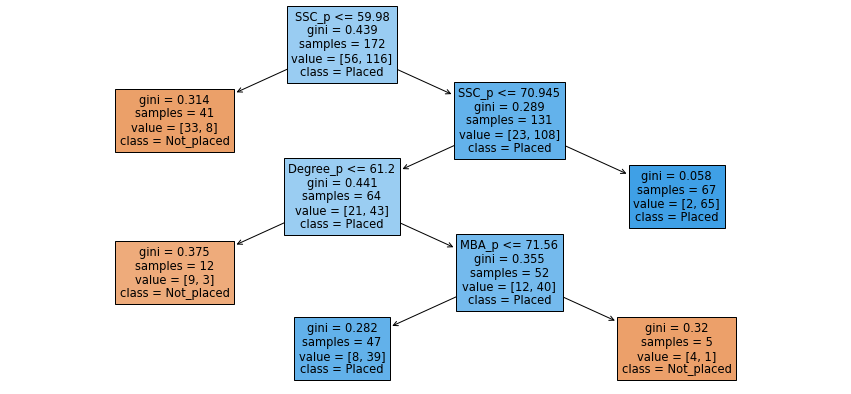

In [67]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [68]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [69]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_s

In [70]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.865882,"(DecisionTreeClassifier(ccp_alpha=0.0195, max_..."
1,logistic,0.848908,"LogisticRegression(max_iter=222, multi_class='..."
2,D-tree,0.807899,"DecisionTreeClassifier(ccp_alpha=0.0185, max_f..."
3,SVM,0.836807,"SVC(C=0.5, kernel='poly', max_iter=167, tol=1e..."


In [71]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8658823529411764,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0195, max_depth=15, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=10,
                         n_estimators=134)},
 {'model_name': 'logistic',
  'best_score': 0.8489075630252101,
  'best_estimator': LogisticRegression(max_iter=222, multi_class='multinomial', tol=1e-10)},
 {'model_name': 'D-tree',
  'best_score': 0.8078991596638655,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0185, max_features='sqrt',
                         min_samples_leaf=2)},
 {'model_name': 'SVM',
  'best_score': 0.8368067226890755,
  'best_estimator': SVC(C=0.5, kernel='poly', max_iter=167, tol=1e-10)}]

In [84]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.0195, max_depth=15, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=10,
                         n_estimators=134)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8837209302325582


In [79]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9069767441860465


In [85]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9302325581395349


In [87]:
rf = RandomForestClassifier(max_depth=15)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9302325581395349


In [88]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8604651162790697


In [89]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [90]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.94      0.97      0.95        32

    accuracy                           0.93        43
   macro avg       0.92      0.89      0.91        43
weighted avg       0.93      0.93      0.93        43



<AxesSubplot:>

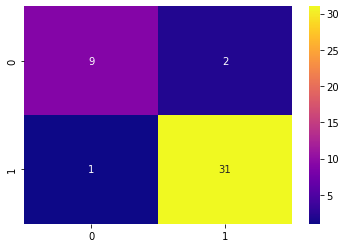

In [92]:
cn = metrics.confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cn,annot=True,cmap='plasma')

# model testing

In [93]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),

In [94]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,HSC_s,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,1,0,67.00,91.00,58.00,58.80,1,1
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0
4,1,0,1,0,85.80,73.60,73.30,55.50,1,1


In [95]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [96]:
resultdf['Predicted'].value_counts()

1    149
0     66
Name: Predicted, dtype: int64

In [97]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

# predicted probablity

In [98]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jayant Shar

[array([[0.15, 0.85]]),
 array([[0., 1.]]),
 array([[0.08, 0.92]]),
 array([[0.98, 0.02]]),
 array([[0., 1.]]),
 array([[0.85, 0.15]]),
 array([[0.89, 0.11]]),
 array([[0.06, 0.94]]),
 array([[0., 1.]]),
 array([[0.57, 0.43]]),
 array([[0.15, 0.85]]),
 array([[0., 1.]]),
 array([[0.97, 0.03]]),
 array([[0.05, 0.95]]),
 array([[0.95, 0.05]]),
 array([[0.04, 0.96]]),
 array([[0.01, 0.99]]),
 array([[0.87, 0.13]]),
 array([[0.82, 0.18]]),
 array([[0.12, 0.88]]),
 array([[0.05, 0.95]]),
 array([[0.01, 0.99]]),
 array([[0.23, 0.77]]),
 array([[0.03, 0.97]]),
 array([[0.07, 0.93]]),
 array([[0.9, 0.1]]),
 array([[0.03, 0.97]]),
 array([[0.04, 0.96]]),
 array([[0., 1.]]),
 array([[0.72, 0.28]]),
 array([[0.14, 0.86]]),
 array([[0.77, 0.23]]),
 array([[0.16, 0.84]]),
 array([[0.03, 0.97]]),
 array([[1., 0.]]),
 array([[0.19, 0.81]]),
 array([[0.92, 0.08]]),
 array([[0.07, 0.93]]),
 array([[0.13, 0.87]]),
 array([[0.11, 0.89]]),
 array([[0.02, 0.98]]),
 array([[0.72, 0.28]]),
 array([[0.92, 0.0

In [99]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.15, 0.85]), 0.15, 0.85)

In [100]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,HSC_s,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,1,0,67.00,91.00,58.00,58.80,1,1,0.15,0.85
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1,0.00,1.00
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1,0.08,0.92
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0,0.98,0.02
4,1,0,1,0,85.80,73.60,73.30,55.50,1,1,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,1,0,80.60,82.00,77.60,74.49,1,1,0.05,0.95
211,1,0,2,0,58.00,60.00,72.00,53.62,1,1,0.14,0.86
212,1,0,1,1,67.00,67.00,73.00,69.72,1,1,0.01,0.99
213,0,1,1,0,74.00,66.00,58.00,60.23,1,1,0.12,0.88


In [101]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()